In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [50]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [51]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [52]:
# lets check data type of columns
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [13]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
# lets have some insight of data
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [31]:
# To  find missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# have to handle null vlues
#Gender,married,Dependents,Loan- Will use the mode function to impute missingvalue
# Loan amount will use the mean function to impute



In [73]:
df['Gender']=df['Gender'].replace(np.nan,df['Gender'].mode().values[0])
df['Married']=df['Married'].replace(np.nan,df['Married'].mode().values[0])
df['Dependents']=df['Dependents'].replace(np.nan,df['Dependents'].mode().values[0])


In [74]:
# will impute corresponding value in credit history as of loan_status
df['Credit_History'].fillna(df['Loan_Status'], inplace = True)

In [75]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [77]:
df['LoanAmount']=df['LoanAmount'].replace(np.nan,df['LoanAmount'].mean())

In [78]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [80]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [81]:
df['Self_Employed']=df['Self_Employed'].replace(np.nan,df['Self_Employed'].mode().values[0])

In [82]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].replace(np.nan,df['Loan_Amount_Term'].mode().values[0])

In [83]:
df[['Credit_History','Loan_Status']]

,Credit_History,Loan_Status
0,1,Y
1,1,N
2,1,Y
3,1,Y
4,1,Y
5,1,Y
6,1,Y
7,0,N
8,1,Y
9,1,N


In [84]:
df['Gender']=df['Gender'].astype(str)
df['Married']=df['Married'].astype(str)
df['Self_Employed']=df['Self_Employed'].astype(str)
df['Loan_Status']=df['Loan_Status'].astype(str)

In [85]:
#  lets encode gender,loan status,Married,Self_Employed
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
List=['Gender','Married','Self_Employed','Loan_Status']
for i in List:
    df[i]=le.fit_transform(df[i])

In [86]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [87]:
df['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

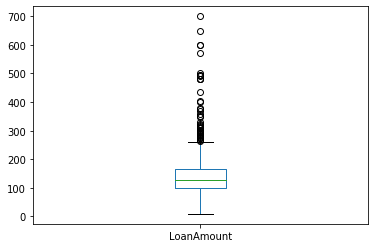

In [90]:
# univarite analysis
df['LoanAmount'].plot.box()

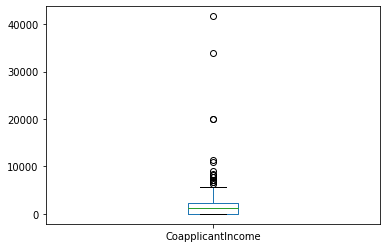

In [91]:
df['CoapplicantIncome'].plot.box()

In [ ]:
# There are few outliers in the data

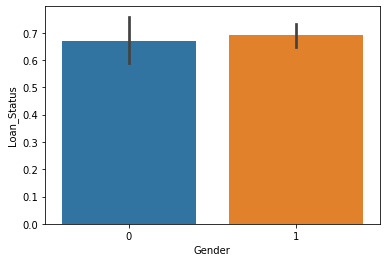

In [88]:
sns.barplot(x='Gender',y='Loan_Status',data=df)

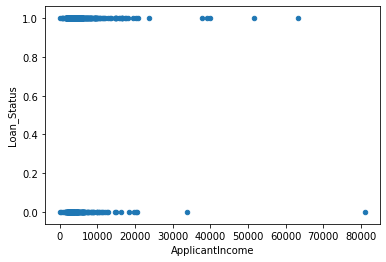

In [95]:
df.plot.scatter('ApplicantIncome','Loan_Status')

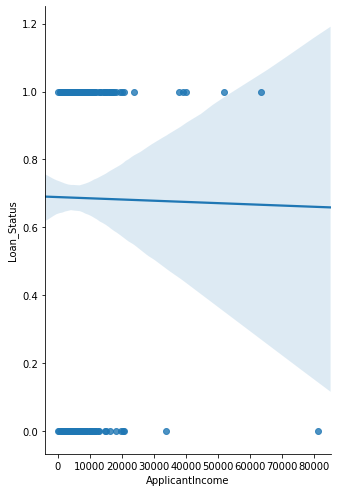

In [97]:
sns.pairplot(df, x_vars=['ApplicantIncome'], y_vars='Loan_Status', size=7, aspect=0.7, kind='reg')

In [94]:
# we have to handle Null values in the data
df.shape

(614, 13)

In [98]:
# Lets check correlation
# features in light colors are more correlated
dfcorr=df.corr()
dfcorr

,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
Gender,1.000000,0.364569,-0.000525,0.058809,0.082912,0.107930,-0.074030,0.017987
Married,0.364569,1.000000,0.004489,0.051708,0.075948,0.147141,-0.100912,0.091478
Self_Employed,-0.000525,0.004489,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.003700
ApplicantIncome,0.058809,0.051708,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.004710
CoapplicantIncome,0.082912,0.075948,-0.016100,-0.116605,1.000000,0.187828,-0.059383,-0.059187
LoanAmount,0.107930,0.147141,0.115260,0.565620,0.187828,1.000000,0.036475,-0.036416
Loan_Amount_Term,-0.074030,-0.100912,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.022549
Loan_Status,0.017987,0.091478,-0.003700,-0.004710,-0.059187,-0.036416,-0.022549,1.000000


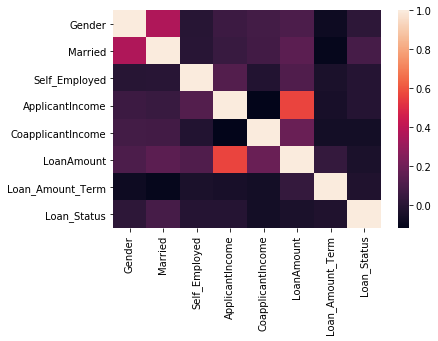

In [99]:
sns.heatmap(dfcorr)


In [41]:
#  majorities of data are poorly coorelated with each other

In [100]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,Graduate,0,5849,0.0,146.412162,360.0,1,Urban,1
1,LP001003,1,1,1,Graduate,0,4583,1508.0,128.000000,360.0,1,Rural,0
2,LP001005,1,1,0,Graduate,1,3000,0.0,66.000000,360.0,1,Urban,1
3,LP001006,1,1,0,Not Graduate,0,2583,2358.0,120.000000,360.0,1,Urban,1
4,LP001008,1,0,0,Graduate,0,6000,0.0,141.000000,360.0,1,Urban,1
5,LP001011,1,1,2,Graduate,1,5417,4196.0,267.000000,360.0,1,Urban,1
6,LP001013,1,1,0,Not Graduate,0,2333,1516.0,95.000000,360.0,1,Urban,1
7,LP001014,1,1,3+,Graduate,0,3036,2504.0,158.000000,360.0,0,Semiurban,0
8,LP001018,1,1,2,Graduate,0,4006,1526.0,168.000000,360.0,1,Urban,1
9,LP001020,1,1,1,Graduate,0,12841,10968.0,349.000000,360.0,1,Semiurban,0


In [101]:
# we can drop loan_id column as its not an important factor
df=df.drop(columns='Loan_ID')

In [102]:
# lets converte to Loan_Status in 0 nd 1

In [103]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [104]:
df.head() # yes=1 and NO= 0

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,Graduate,0,5849,0.0,146.412162,360.0,1,Urban,1
1,1,1,1,Graduate,0,4583,1508.0,128.000000,360.0,1,Rural,0
2,1,1,0,Graduate,1,3000,0.0,66.000000,360.0,1,Urban,1
3,1,1,0,Not Graduate,0,2583,2358.0,120.000000,360.0,1,Urban,1
4,1,0,0,Graduate,0,6000,0.0,141.000000,360.0,1,Urban,1


In [105]:
# Univariate analysis- distribution of average price
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [49]:
# 192 loan status are no. 

In [114]:
df.shape

(614, 12)

In [115]:
df=pd.get_dummies(df)

In [116]:
# lets seperate Target and rest
x=df.drop(columns='Loan_Status')
y=df['Loan_Status']

In [117]:
x.shape,y.shape


((614, 20), (614,))

In [118]:
# Its a classification case


In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [120]:
# Finding Best model
lg=LogisticRegression()
max_accuracy_score=0

In [121]:
# Finding best r_state
def maxr2_score(lg,x,y):
    max_accuracy_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=r_state)
        lg.fit(x_train,y_train)
        pred=lg.predict(x_test)
        ac_scr=accuracy_score(y_test,pred)
        print('accuracy score corresponding to random state',r_state," is ",ac_scr)
        if ac_scr>max_accuracy_score:
            max_accuracy_score=ac_scr
            final_r_state=r_state
    print('max accuracy score corresponding to ', final_r_state," is ",max_accuracy_score)
    return final_r_state

In [122]:
# Lets use LogisticRegression
r_state=maxr2_score(lg,x,y)

accuracy score corresponding to random state 42  is  0.8211382113821138
accuracy score corresponding to random state 43  is  0.8211382113821138
accuracy score corresponding to random state 44  is  0.8617886178861789
accuracy score corresponding to random state 45  is  0.7967479674796748
accuracy score corresponding to random state 46  is  0.8536585365853658
accuracy score corresponding to random state 47  is  0.8211382113821138
accuracy score corresponding to random state 48  is  0.7886178861788617
accuracy score corresponding to random state 49  is  0.8373983739837398
accuracy score corresponding to random state 50  is  0.7967479674796748
accuracy score corresponding to random state 51  is  0.8536585365853658
accuracy score corresponding to random state 52  is  0.8373983739837398
accuracy score corresponding to random state 53  is  0.7886178861788617
accuracy score corresponding to random state 54  is  0.8699186991869918
accuracy score corresponding to random state 55  is  0.764227642

In [123]:
# To find optimum value of n_neighbours for KNN model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
neighbors={"n_neighbors":range(1,30)}
knr=KNeighborsClassifier()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 27}

In [124]:
# Lets use KNN regression model
knr=KNeighborsClassifier(n_neighbors=27)
r_state=maxr2_score(knr,x,y)

accuracy score corresponding to random state 42  is  0.6504065040650406
accuracy score corresponding to random state 43  is  0.6910569105691057
accuracy score corresponding to random state 44  is  0.7235772357723578
accuracy score corresponding to random state 45  is  0.6422764227642277
accuracy score corresponding to random state 46  is  0.7317073170731707
accuracy score corresponding to random state 47  is  0.7073170731707317
accuracy score corresponding to random state 48  is  0.6991869918699187
accuracy score corresponding to random state 49  is  0.7073170731707317
accuracy score corresponding to random state 50  is  0.6504065040650406
accuracy score corresponding to random state 51  is  0.6991869918699187
accuracy score corresponding to random state 52  is  0.6910569105691057
accuracy score corresponding to random state 53  is  0.6178861788617886
accuracy score corresponding to random state 54  is  0.6260162601626016
accuracy score corresponding to random state 55  is  0.634146341

In [125]:
# we will use gradient boosting Technique
# for getting best prameters will use grid search
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(gbc,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.001, 'n_estimators': 500}

In [126]:
gcr=GradientBoostingClassifier(learning_rate=0.1,n_estimators=500)
r_state=maxr2_score(gcr,x,y)

accuracy score corresponding to random state 42  is  0.7723577235772358
accuracy score corresponding to random state 43  is  0.7886178861788617
accuracy score corresponding to random state 44  is  0.8211382113821138
accuracy score corresponding to random state 45  is  0.7642276422764228
accuracy score corresponding to random state 46  is  0.8130081300813008
accuracy score corresponding to random state 47  is  0.7642276422764228
accuracy score corresponding to random state 48  is  0.7886178861788617
accuracy score corresponding to random state 49  is  0.8048780487804879
accuracy score corresponding to random state 50  is  0.7804878048780488
accuracy score corresponding to random state 51  is  0.7804878048780488
accuracy score corresponding to random state 52  is  0.8048780487804879
accuracy score corresponding to random state 53  is  0.7886178861788617
accuracy score corresponding to random state 54  is  0.8211382113821138
accuracy score corresponding to random state 55  is  0.764227642

In [127]:
SV=SVC()
DT=DecisionTreeClassifier()
GNB=GaussianNB()

In [128]:
# Use adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_cls=AdaBoostClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],'base_estimator':[DecisionTreeClassifier()]}
clf=GridSearchCV(ada_cls,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=None, splitter='best'),
 'learning_rate': 0.001,
 'n_estimators': 500}

In [129]:
ada_cls=AdaBoostClassifier(base_estimator=DT,learning_rate=0.001,n_estimators=500)
r_state=maxr2_score(ada_cls,x,y)

accuracy score corresponding to random state 42  is  0.7642276422764228
accuracy score corresponding to random state 43  is  0.7967479674796748
accuracy score corresponding to random state 44  is  0.7886178861788617
accuracy score corresponding to random state 45  is  0.7479674796747967
accuracy score corresponding to random state 46  is  0.8292682926829268
accuracy score corresponding to random state 47  is  0.7317073170731707
accuracy score corresponding to random state 48  is  0.6991869918699187
accuracy score corresponding to random state 49  is  0.7317073170731707
accuracy score corresponding to random state 50  is  0.7398373983739838
accuracy score corresponding to random state 51  is  0.7479674796747967
accuracy score corresponding to random state 52  is  0.7317073170731707
accuracy score corresponding to random state 53  is  0.7560975609756098
accuracy score corresponding to random state 54  is  0.7723577235772358
accuracy score corresponding to random state 55  is  0.674796747

In [ ]:
# Logistice regression is the best model

In [130]:
#Logistic Regression model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=56)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
acc_log=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))

0.8617886178861789
[[15 15]
 [ 2 91]]


In [131]:
lg_score=cross_val_score(lg,x_train,y_train,cv=5).mean()
lg_score

0.8185851785262683

In [132]:
from sklearn.externals import joblib

In [134]:
joblib.dump(lg,"Loan_status_predict.pkl")

['Loan_status_predict.pkl']

In [135]:
a=[pred,y_test]

In [136]:
a

[array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64), 348    1
 538    0
 430    1
 536    1
 354    1
 60     1
 102    1
 245    0
 578    1
 532    0
 277    1
 324    1
 385    1
 310    1
 27     1
 606    1
 560    1
 590    1
 98     1
 204    1
 205    1
 252    1
 608    1
 158    1
 7      0
 397    1
 147    1
 28     0
 479    0
 460    1
       ..
 442    1
 273    1
 137    1
 498    1
 258    0
 363    1
 237    1
 383    1
 407    1
 94     1
 437    1
 314    0
 365    0
 300    0
 529    1
 316    1
 244    1
 338    0
 42     1
 219    1
 34     0
 293    0
 197    1
 164    1
 130    1
 127    1